In [2]:
# Dependencies and Setup
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from tensorflow.keras.utils import to_categorical
# File to Load (Remember to Change These)


tomato_model_1 = "../Resources/movie_metadata_adjusted_revenue_starpower.csv"
# Read the Data

tomato_df = pd.read_csv(tomato_model_1)

tomato_df = tomato_df.dropna()
tomato_df.head()


,Column1,title,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,star_power,first_genre
0,0,The Godfather,36703349.28,41.109264,1972,1.499126e+09,175,8.5,6024,1,Drama
1,1,The Shawshank Redemption,43134278.00,51.645403,1994,4.889955e+07,142,8.5,8358,1,Drama
2,2,Fight Club,96693277.31,63.869599,1999,1.547917e+08,139,8.3,9678,1,Comedy
3,3,Schindler's List,38930103.81,41.725123,1993,5.686725e+08,195,8.3,4436,1,Drama
4,4,One Flew Over the Cuckoo's Nest,14258364.31,35.529554,1975,5.179649e+08,133,8.3,3001,1,Classics


In [3]:

X = tomato_df[["star_power", "budget"]]
X_2 = tomato_df[["popularity", "vote_average", "vote_count", "release_date"]]
y = tomato_df["revenue"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1081, 2) (1081, 1)


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [5]:
X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [6]:
from tensorflow.keras.models import Sequential
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence
#MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ]
        }
       ]

clf = GridSearchCV(MLPRegressor(), param_grid, cv=3,
                           scoring='accuracy')
clf.fit(X_train,np.ravel(y_train))


print("Best parameters set found on development set:")
print(clf.best_params_)

In [7]:
tree = DecisionTreeRegressor()
mlp = make_pipeline(StandardScaler(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 tol=1e-1, max_iter=5000, random_state=0))
tree.fit(X_train, np.ravel(y_train))
mlp.fit(X_train_scaled, np.ravel(y_train)) #1e-1

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(50, 50),
                              learning_rate='constant', learning_rate_init=0.01,
                              max_fun=15000, max_iter=5000, momentum=0.9,
                              n_iter_no_change=10, nesterovs_momentum=True,
                              power_t=0.5, random_state=0, shuffle=True,
                              solver='adam', tol=0.1, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

C:\Users\jasonpe\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\tree\_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


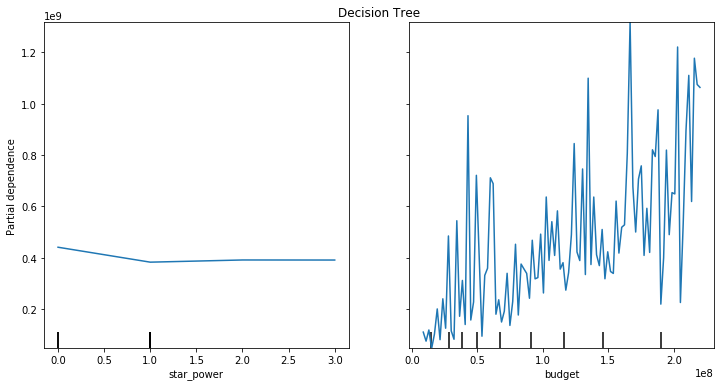

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(tree, X_train, ["star_power", "budget"], ax=ax)

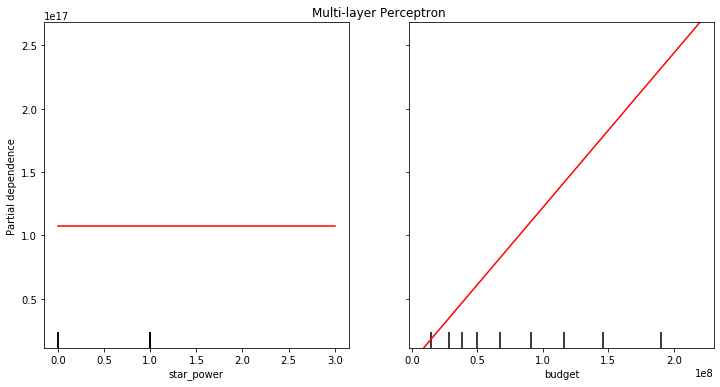

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp = plot_partial_dependence(mlp, X_train, ["star_power", "budget"], ax=ax,
                                   line_kw={"c": "red"})

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score

encoded_predictions = model.predict_classes(X_test_scaled[:5])
print(f"Predicted classes: {encoded_predictions}")

In [11]:
X_train2, X_test2, y_train, y_test = train_test_split(
    X_2, y, random_state=42)

In [12]:
X_scaler2 = MinMaxScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [13]:
tree_2 = DecisionTreeRegressor()
mlp_2 = make_pipeline(StandardScaler(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 tol=1e-1, max_iter=5000, random_state=0))
tree_2.fit(X_train2, np.ravel(y_train))
mlp_2.fit(X_train_scaled2, np.ravel(y_train)) #1e-1

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(50, 50),
                              learning_rate='constant', learning_rate_init=0.01,
                              max_fun=15000, max_iter=5000, momentum=0.9,
                              n_iter_no_change=10, nesterovs_momentum=True,
                              power_t=0.5, random_state=0, shuffle=True,
                              solver='adam', tol=0.1, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

C:\Users\jasonpe\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\sklearn\tree\_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


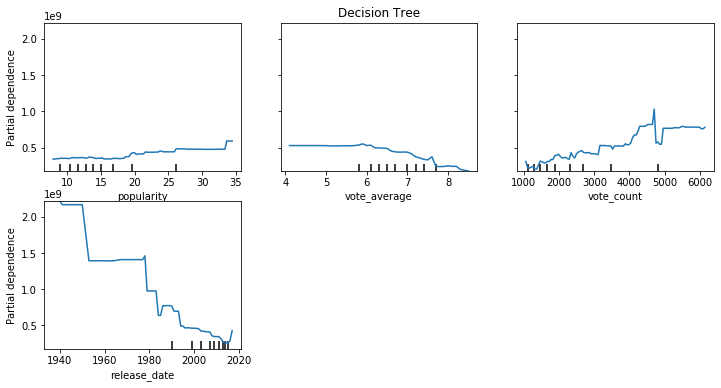

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp_2 = plot_partial_dependence(tree_2, X_train2, ["popularity", "vote_average", "vote_count", "release_date"], ax=ax)

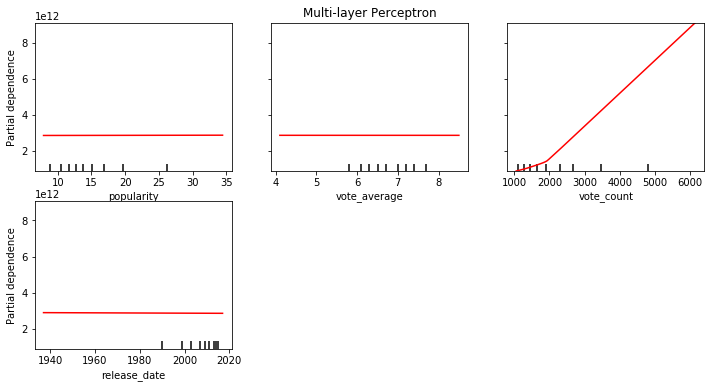

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Multi-layer Perceptron")
mlp_disp2 = plot_partial_dependence(mlp_2, X_train2, ["popularity", "vote_average", "vote_count", "release_date"], ax=ax,
                                   line_kw={"c": "red"})